In [1]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers, models
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
# Set the image shape
IMAGE_SHAPE = (224, 224)

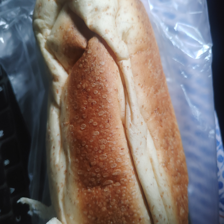

In [3]:
image_path = 'bread.jpeg'
bread_image = Image.open(image_path).resize(IMAGE_SHAPE)
bread_image

In [4]:
# Number of food classes
num_of_foods = 12

# Load the pre-trained ResNet50 model without the top classification layers
base_model = ResNet50(
    weights='imagenet',       # Load weights pre-trained on ImageNet
    include_top=False,        # Do not include the ImageNet classifier at the top
    input_shape=(224, 224, 3) # Define the input shape
)

# Freeze the base model to prevent its weights from being updated during training
base_model.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


In [5]:
# Create a Sequential model and add the pre-trained ResNet50 model and custom layers
classifier = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),            # Reduce the tensor dimensions
    layers.Dense(128, activation='relu'),       # Add a fully connected layer
    layers.Dense(num_of_foods, activation='softmax')  # Output layer for classification
])

# Print the model summary
classifier.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [32]:
# Preprocess the input image
bread_array = np.array(bread_image) / 255.0
bread_array.shape

(224, 224, 3)

In [33]:
# Reshape the NumPy array
bread_array[np.newaxis, ...].shape

(1, 224, 224, 3)

In [34]:
result = classifier.predict(bread_array[np.newaxis, ...])
# Reshape the NumPy array
bread_array[np.newaxis, ...].shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


(1, 224, 224, 3)

In [31]:
predicted_label_index = np.argmax(result)
predicted_label_index

0

In [35]:
image_labels = []
with open("food_class.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['banku', 'beans', 'bread', 'fufu', 'jollof']

In [36]:
# Print the predicted label
print(image_labels[predicted_label_index])

banku


In [10]:
# Loading and verifying dataset
data_dir = 'D:/food_dataset'  # Update with your actual path
dataset = image_dataset_from_directory(
    data_dir,
    image_size=(224, 224),  # Image size matching ResNet input
    batch_size=32,          # Set the batch size
    label_mode='categorical'  # Multiple classes
)

Found 6292 files belonging to 12 classes.


In [11]:
# Verify dataset
class_names = dataset.class_names
print(class_names)

['Banku', 'Beans', 'Bread', 'Fufu', 'Jollof', 'Kenkey', 'Kokonte', 'Plain Rice', 'Plantain', 'Porridge', 'Waakye', 'Yam']


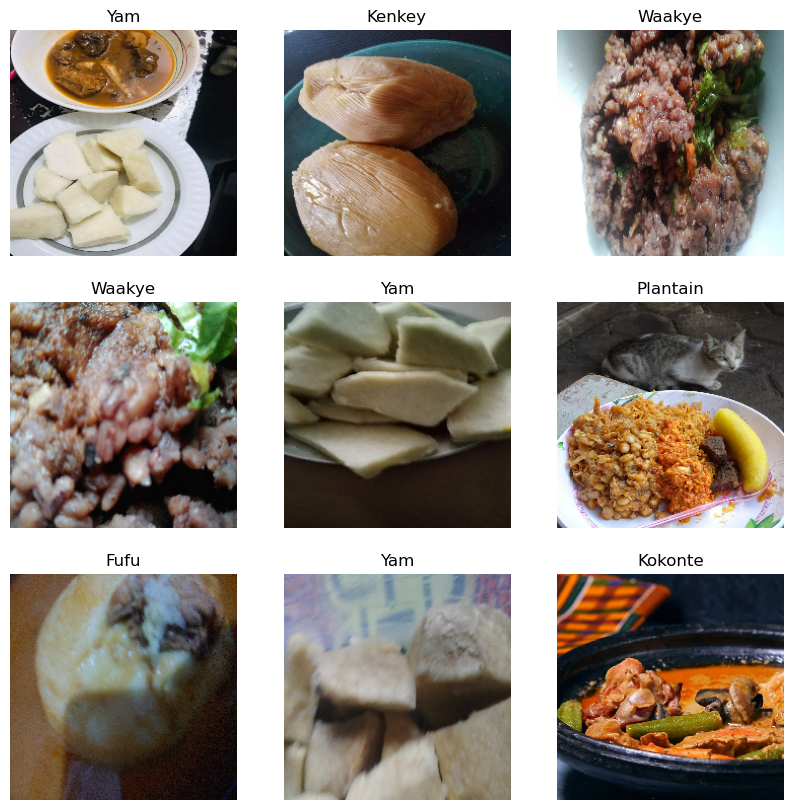

In [38]:
# Plot some sample images from the dataset
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[tf.argmax(labels[i])])
        plt.axis("off")

In [43]:
import pathlib
data_dir = 'D:/food_dataset/Bread'
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('D:/food_dataset/Bread')

In [45]:
# Define the directory containing the dataset
data_dir = 'D:/food_dataset'  # Update this with your actual path

# List the first five .jpeg files in the dataset directory
jpeg_files = glob.glob(os.path.join(data_dir, '**', '*.jpeg'), recursive=True)[:5]

# Print the paths of the first five .jpeg files
for file in jpeg_files:
    print(file)

D:/food_dataset\Banku\-african-food-two-balls-spicy-sauce-typical-dish-good-dinner-lunch-215604322.jpeg
D:/food_dataset\Banku\1200px-Ghanaian_Banku_cuisine_dish_food.jpeg
D:/food_dataset\Banku\126054251_364930781267593_715183987144198136_n.jpeg
D:/food_dataset\Banku\1493413423_69395.jpeg
D:/food_dataset\Banku\1595337032112.jpeg


In [47]:
# Define the path to the yam folder
yam_folder = 'D:/food_dataset/yam'  # Update this path to match your directory structure
#listing the first 5 of yam folder
glob.glob(os.path.join(yam_folder, '*.jp*g'))[:5]

['D:/food_dataset/yam\\130442322_1444610412411481_8858883769605968659_n.jpeg',
 'D:/food_dataset/yam\\20190904052954_IMG_1755-02.jpeg',
 'D:/food_dataset/yam\\20220607_133329.jpeg',
 'D:/food_dataset/yam\\20230528_150937.jpeg',
 'D:/food_dataset/yam\\20230528_150938.jpeg']

In [48]:
food_images_dict = {
    'banku': glob.glob(os.path.join('D:/food_dataset/banku', '*.jp*g')),
    'beans': glob.glob(os.path.join('D:/food_dataset/beans', '*.jp*g')),
    'bread': glob.glob(os.path.join('D:/food_dataset/bread', '*.jp*g')),
     'fufu': glob.glob(os.path.join('D:/food_dataset/fufu', '*.jp*g')),
    'jollof': glob.glob(os.path.join('D:/food_dataset/jollof', '*.jp*g')),
    'kenkey': glob.glob(os.path.join('D:/food_dataset/kenkey', '*.jp*g')),
    'kokonte': glob.glob(os.path.join('D:/food_dataset/kokonte', '*.jp*g')),
    'plain Rice': glob.glob(os.path.join('D:/food_dataset/plain rice', '*.jp*g')),
    'plaintain': glob.glob(os.path.join('D:/food_dataset/plaintain', '*.jp*g')),
    'porridge': glob.glob(os.path.join('D:/food_dataset/porridge', '*.jp*g')),
    'waakye': glob.glob(os.path.join('D:/food_dataset/waakye', '*.jp*g')),
    'yam': glob.glob(os.path.join('D:/food_dataset/yam', '*.jp*g')),
}


In [49]:
food_labels_dict = {
    'banku':0,
    'beans':1,
    'bread':2,
    'fufu':3,
    'jollof':4,
    'kenkey':5,
    'kokonte':6,
    'plain Rice':7,
    'plaintain':8,
    'porridge':9,
    'waakye':10,
    'yam':11,
}

In [46]:
# Define the directory containing the dataset
data_dir = 'D:/food_dataset'  # Update this with your actual path

# Use glob to list all jpeg files in the dataset directory and its subdirectories
jpeg_files = glob.glob(os.path.join(data_dir, '**', '*.jpeg'), recursive=True)

# Count the number of jpeg files
image_count = len(jpeg_files)
print(f"Total number of JPEG files: {image_count}")

Total number of JPEG files: 6292


In [81]:
str(food_images_dict['kenkey'][1])

'D:/food_dataset/kenkey\\121971939_375209380263942_4514544357447713712_n1.jpeg'

In [82]:
img = cv2.imread(str(food_images_dict['kenkey'][1]))
img.shape

(719, 719, 3)

In [83]:
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [84]:
# Prepare data
X, y = [], []
IMAGE_SHAPE = (224, 224)  # Define the image shape

for food_name, images in food_images_dict.items():
    for image_path in images:
        img = cv2.imread(str(image_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        resized_img = cv2.resize(img, IMAGE_SHAPE)
        X.append(resized_img)
        y.append(food_labels_dict[food_name])


In [85]:
X = np.array(X, dtype=np.float32)
y = np.array(y)

In [86]:
# Preprocess the images using ResNet50's preprocessing function
X = preprocess_input(X)

In [87]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [89]:
# Build the model
num_of_foods = 12
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model.trainable = False

inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(num_of_foods, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
batch_size = 32
epochs = 10
history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1
)

Epoch 1/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 946s 4s/step - accuracy: 0.7442 - loss: 0.8351 - val_accuracy: 0.9223 - val_loss: 0.2490
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 487s 4s/step - accuracy: 0.9527 - loss: 0.1406 - val_accuracy: 0.9448 - val_loss: 0.1772
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 365s 3s/step - accuracy: 0.9836 - loss: 0.0547 - val_accuracy: 0.9509 - val_loss: 0.1705
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 375s 3s/step - accuracy: 0.9933 - loss: 0.0278 - val_accuracy: 0.9591 - val_loss: 0.1391
Epoch 5/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 335s 2s/step - accuracy: 0.9960 - loss: 0.0166 - val_accuracy: 0.9550 - val_loss: 0.1488
Epoch 6/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 301s 2s/step - accuracy: 0.9976 - loss: 0.0129 - val_accuracy: 0.9550 - val_loss: 0.1411
Epoch 7/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 417s 3s/step - accuracy: 0.9956 - loss: 0.0228 - val_accuracy: 0.9591 - val_loss: 0.1453
Epoch 8/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 434s 3s/step - accuracy: 0.9979 - loss: 0.0107 - val_accu

In [1]:
# Evaluate the model
test_loss, test_accuracy = basemodel.evaluate(X_test, y_test)

NameError: name 'model' is not defined